# 목적

- 텐서플로우 스타일을 익히고, 기본 사용법을 습득한다

In [0]:
import tensorflow as tf
%tensorflow_version 1.x

# 스타일

- 1. 데이터가 흘러가는 플로우를 구성
  - 연산의 입력, 출력의 흐름을 설계
  - 파이썬으로 구성
- 2. 세션으로 처리(I/O)
  - 실제 연산을 수행하는 객체
  - C++ 작동시킴
  - 세션을 연다
  - 데이터를 입력받아서, C++에게 연산시키고, 결과를 파이썬에게 돌려준다
  - 세션을 닫는다

# 기본 틀

In [0]:
# 1. 데이터가 흘러가는 플로우를 구성
# 연산을 할려면 요소들이 존재
# 상수
hi = tf.constant('Hi DL!!')
hi

<tf.Tensor 'Const:0' shape=() dtype=string>

In [0]:
# 2. 세션을 열고 데이터를 주입, 실행, 결과를 돌려받는다
# 2-1. 세션을 연다
sess = tf.Session()
# 2-2. 데이터를 주입하여 연산(나중에 신경망) => 학습!!, 훈련!!
# 플로우를 실행 함수에 넣어서 연산을 수행
tmp  = sess.run( hi )
# 2-3. 실형 결과를 돌려받아서 출력
print( tmp )
# 2-4. 세션 닫기
sess.close()

b'Hi DL!!'


In [0]:
with tf.Session() as sess:
  # GPU 사용 설정은 이 지점 혹은 with문 위가 적절하다
  print( sess.run( hi ) )

b'Hi DL!!'


# 텐서플로우를 이용한 간단한 연산(계산)

In [0]:
# 1. 플로우를 구성

# 상수정의
a = tf.constant( 123 )
b = tf.constant( 500 )
a, b
# 'Const_1:0',  텐서의 이름 (부여하지 않으면 자동 부과)
# 이름은 향후의 플로우를 시각화 해서 텐서보드에서 확인할때, 이름으로 사용

(<tf.Tensor 'Const_1:0' shape=() dtype=int32>,
 <tf.Tensor 'Const_2:0' shape=() dtype=int32>)

In [0]:
# 계산을 정의(연산식 정의, 실제 연산은 수행하지 않는다)
# 실제 연산은 언제? -> 세션이 열리고, 데이터 주입, 실행을 하면 그때 작동
add_opration = a + b
add_opration
# 더한다는 형태(계산식)만 가진다

<tf.Tensor 'add:0' shape=() dtype=int32>

In [0]:
# 2. 실행
with tf.Session() as sess:
  # 실행후 결과를 돌려받는다
  res = sess.run( add_opration )
  print( res, type(res) )

623 <class 'numpy.int32'>


# 텐서

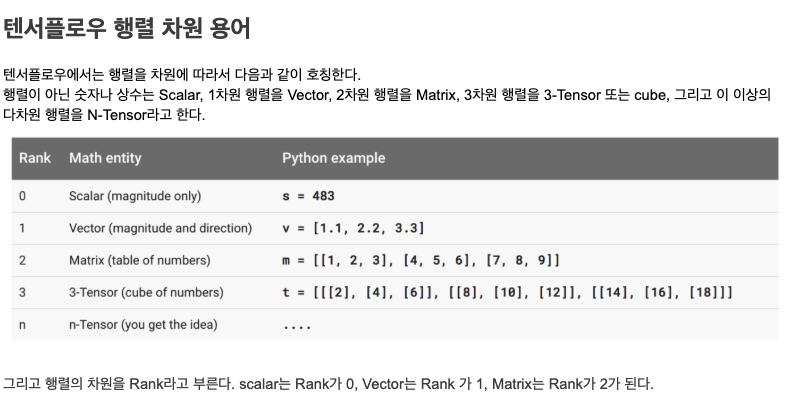

In [0]:
from IPython.display import Image
f_path ='/content/drive/My Drive/Colab Notebooks/2기/dl_data/텐서용어.png'
Image( f_path, width='300' )

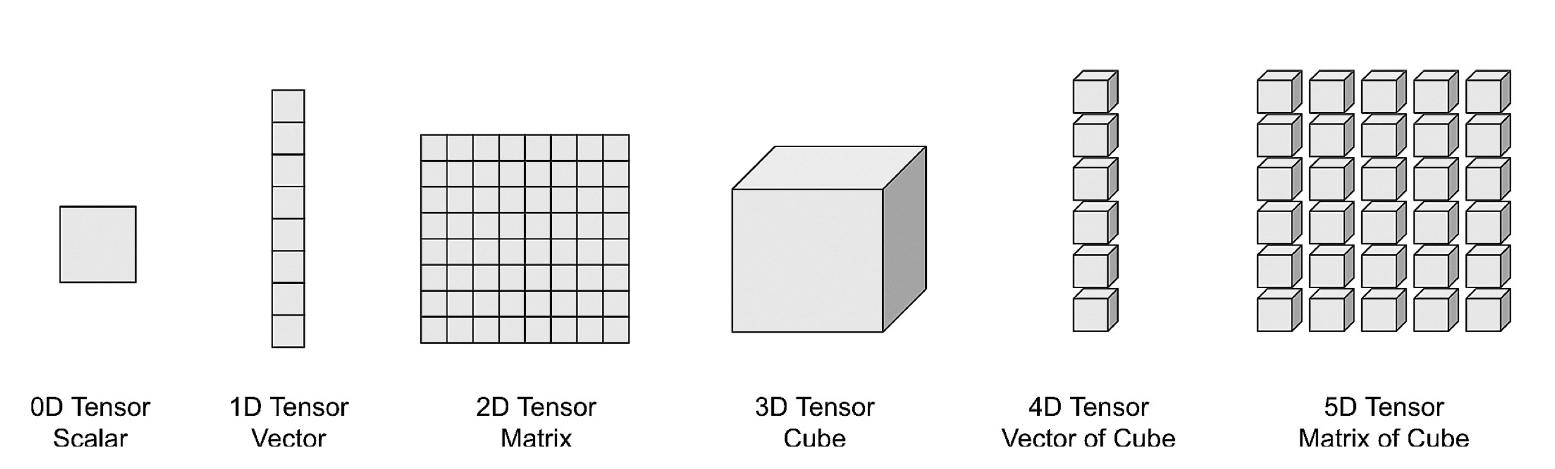

In [0]:
f_path ='/content/drive/My Drive/Colab Notebooks/2기/dl_data/8.tensor.jpeg'
Image( f_path, width='300' )

# 텐서플로우의 기본 항목 사용

- 상수 : Constant
- 변수 : Variable
- 플레이스홀더 : Placeholder
- 데이터가 흘러가는 관계, 데이터간의 관계, 입력과 출력에 대한 관계(그래프) : Data Flow graph

In [0]:
# 상수
a = tf.constant( 100, name='a' )
b = tf.constant( 200, name='b' )
c = tf.constant( 300, name='c' )
a,b,c

(<tf.Tensor 'a:0' shape=() dtype=int32>,
 <tf.Tensor 'b:0' shape=() dtype=int32>,
 <tf.Tensor 'c:0' shape=() dtype=int32>)

In [0]:
# 변수 : 값이 변한다!!, 변수가 가진 값은 변할수 있다
# 변수의 값은 연산의 결과로 받겠다
v = tf.Variable( 0, name='v' )
v

<tf.Variable 'v:0' shape=() dtype=int32_ref>

In [0]:
# 연산식, 계산식
calc_opration = a + b + c
calc_opration

<tf.Tensor 'add_2:0' shape=() dtype=int32>

In [0]:
# 데이터 플로우 그래프
# 변수 v에 calc_opration의 계산값을 대입하라
# a, b, c라는 상수가 더해서 v에 흘러들어가는 관계를 정의했다
# a, b, c는 데이터이므로 데이터가 흘러가는 관계 : 데이터 플로우 그래프
assign_opration = tf.assign( v, calc_opration )
assign_opration

<tf.Tensor 'Assign:0' shape=() dtype=int32_ref>

In [0]:
# 2. 실행
with tf.Session() as sess:
  # 최종 그래프가 입력, 수행
  res = sess.run( assign_opration )
  print( res, type(res) )
  # 세션이 수행되었다면, 변수 v에 값이 설정되었을 것이다
  res = sess.run( v )
  print( res, type(res) )

600 <class 'numpy.int32'>
600 <class 'numpy.int32'>


# 데이터 주입:플레이스홀더를 이용하여

- 주입할 데이터의 shape을 결정한다
- 플레이스 홀더를 통해서, 학습데이터가 흘러 들어간다
- 레이어를 통과할때마다 플레이스 홀더를 통해서 shape이 결정된다
- 레이어(신경망)을 구성할때 정하는 수치가 실제적으로 반영되는 곳

In [0]:
# 고정크기 플레이스 홀더
# 정수값 3개를 받는 플레이스 홀더를 정의해라
a = tf.placeholder( tf.int32, [3]  )
a
# scalar 값 3개를 담을 수 있는 1D 텐서를 만들었다

<tf.Tensor 'Placeholder:0' shape=(3,) dtype=int32>

In [0]:
# 상수
b = tf.constant( 2 )
b

<tf.Tensor 'Const_4:0' shape=() dtype=int32>

In [0]:
# 데이터 플로우 그래프
# 백터 * 스칼라
x_opration = a * b
x_opration

<tf.Tensor 'mul_1:0' shape=(3,) dtype=int32>

In [0]:
# 연산 수행
with tf.Session() as sess:
  # 데이터를 주입하여, 연산을 수행한다
  # 데이터를 주입 => feed_dict => { 키(플레이스홀더):값 }
  res = sess.run( x_opration, feed_dict={ a:[1,2,3] } )
  print( res, type(res) )

[2 4 6] <class 'numpy.ndarray'>


In [0]:
# 가변크기 플레이스 홀더
# 데이터가 어떤 크기의 shape으로 들어올지 모르겟다!! = None
a = tf.placeholder( tf.int32, [None]  )
b = tf.constant( 3 )
x2_opration = a * b

In [0]:
with tf.Session() as sess:  
  res = sess.run( x2_opration, feed_dict={ a:[1,2,3] } )
  print( res, type(res) )
  res = sess.run( x2_opration, feed_dict={ a:[100,200] } )
  print( res, type(res) )

[3 6 9] <class 'numpy.ndarray'>
[300 600] <class 'numpy.ndarray'>


# 세션 구동 

- Session()
  - 선 설계 => 후 실행
- InteractiveSession()
  - run() 없이, eval()을 통해 바로 실행

In [0]:
sess = tf.InteractiveSession()

In [0]:
m1 = tf.constant( [ [1., 2.], [3., 4.] ] )
m1

<tf.Tensor 'Const_6:0' shape=(2, 2) dtype=float32>

In [0]:
m2 = tf.constant( [ [100.], [200.] ] )
m2

<tf.Tensor 'Const_7:0' shape=(2, 1) dtype=float32>

In [0]:
# 행렬의 곱
tf.matmul( m1, m2 ).eval()

array([[ 500.],
       [1100.]], dtype=float32)

# 브로드 캐스팅 (CNN구현시 다시와서 완성)

- +, -, * 등등 행렬 연산시 적용
- 연산을 수행하는 행렬간의 차원이 맞지 않은 경우
- 행렬을 자동으로 늘려서(stretch) 연산이 가능하게 맞춰주는 개념